# SVC

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# data reading 

In [2]:
data = pd.read_csv("./breast-cancer-wisconsin-data_data.csv")

# Drop Unwanted data

In [3]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Information about the data 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# CLasses Visualization

In [5]:
from collections import Counter

c = Counter(data['diagnosis'])
print(f"Classes of the data {c.keys()}")
print(f"count of the data {c.values()}")

Classes of the data dict_keys(['M', 'B'])
count of the data dict_values([212, 357])


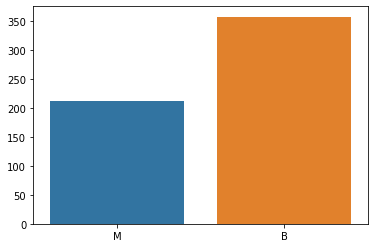

In [6]:
x = list(c.keys())
xval = []
h = list(c.values())

for i in x:
    xval.append(str(i))

sns.barplot(x=xval,y=h,data=data)
plt.show()

# LabelEncoder

In [7]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
data['diagnosis'] = lb.fit_transform(data['diagnosis'])

# Shuffle data

In [8]:
from sklearn.utils import shuffle


data_S = shuffle(data.values)

In [9]:
data_S

array([[ 0.     , 15.71   , 13.93   , ...,  0.1374 ,  0.2723 ,  0.07071],
       [ 1.     , 16.27   , 20.71   , ...,  0.1583 ,  0.3103 ,  0.082  ],
       [ 1.     , 14.54   , 27.54   , ...,  0.1712 ,  0.4218 ,  0.1341 ],
       ...,
       [ 0.     ,  8.734  , 16.84   , ...,  0.     ,  0.2445 ,  0.08865],
       [ 1.     , 24.25   , 20.2    , ...,  0.2248 ,  0.3222 ,  0.08009],
       [ 0.     , 12.     , 15.65   , ...,  0.07632,  0.3379 ,  0.07924]])

# Features and Labels 

In [10]:
X = data_S[:, 1:]
Y = data_S[:, 0]

In [11]:
X

array([[1.571e+01, 1.393e+01, 1.020e+02, ..., 1.374e-01, 2.723e-01,
        7.071e-02],
       [1.627e+01, 2.071e+01, 1.069e+02, ..., 1.583e-01, 3.103e-01,
        8.200e-02],
       [1.454e+01, 2.754e+01, 9.673e+01, ..., 1.712e-01, 4.218e-01,
        1.341e-01],
       ...,
       [8.734e+00, 1.684e+01, 5.527e+01, ..., 0.000e+00, 2.445e-01,
        8.865e-02],
       [2.425e+01, 2.020e+01, 1.662e+02, ..., 2.248e-01, 3.222e-01,
        8.009e-02],
       [1.200e+01, 1.565e+01, 7.695e+01, ..., 7.632e-02, 3.379e-01,
        7.924e-02]])

# Data Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [13]:
X = sc.fit_transform(X)

# Splitting the data 

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# SVC

In [15]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, Y_train)

# PREDICTING THE DATA 

In [16]:
y_pred = svc.predict(X_test)

# METRICS

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Test Accuracy score of the data {accuracy_score(y_pred, Y_test)}")
print(f"Train Accuracy score of the data {accuracy_score(svc.predict(X_train), Y_train)}")

Test Accuracy score of the data 0.9912280701754386
Train Accuracy score of the data 0.9868131868131869


# CLASSIFICATION REPORT

In [18]:
print("********* TRAIN CLASSIFICATION REPORT ***********")
print(" ")
print(classification_report(svc.predict(X_train), Y_train))

print(" ")

print("********* TEST CLASSIFICATION REPORT ***********")
print(" ")
print(classification_report(y_pred, Y_test))

********* TRAIN CLASSIFICATION REPORT ***********
 
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       289
         1.0       0.97      1.00      0.98       166

    accuracy                           0.99       455
   macro avg       0.98      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455

 
********* TEST CLASSIFICATION REPORT ***********
 
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        75
         1.0       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



# CONFUSION MATRIX

Test confusion matrix of the data 
 [[74  1]
 [ 0 39]]


<AxesSubplot:>

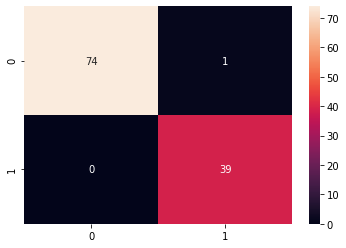

In [19]:
print(f"Test confusion matrix of the data \n {confusion_matrix(y_pred, Y_test)}")
sns.heatmap(confusion_matrix(y_pred, Y_test), annot=True)

Train confusion matrix of the data 
 [[283   6]
 [  0 166]]


<AxesSubplot:>

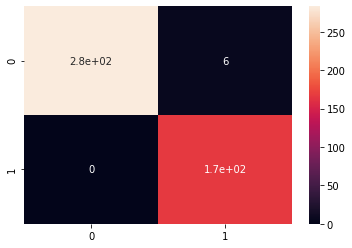

In [20]:
print(f"Train confusion matrix of the data \n {confusion_matrix(svc.predict(X_train), Y_train)}")
sns.heatmap(confusion_matrix(svc.predict(X_train), Y_train), annot=True)

# Neural Nets

In [21]:
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.models import Sequential
from keras.utils import to_categorical 

# splitting the data for validation

In [22]:
# Validation data 

X_train, X_val, Y_train, Y_val= train_test_split(X_train, Y_train, test_size=0.2)

# Categorical data

In [23]:
Y_train = to_categorical(Y_train, num_classes=2)
Y_test = to_categorical(Y_test, num_classes=2)
Y_val = to_categorical(Y_val, num_classes=2)

# Model creation 

In [24]:
model = Sequential()

model.add(Dense(1024, input_shape=(X_train.shape[1],)))
model.add(Dense(512, activation="relu"))
model.add(Dense(216, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(2, activation="softmax"))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              31744     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 216)               110808    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               27776     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 6

# Model compile

In [26]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model 

In [27]:
history = model.fit(X_train, Y_train,
         batch_size=128,epochs=130,
         validation_data = (X_val, Y_val))

Epoch 1/130
3/3 [==============================] - 2s 464ms/step - loss: 0.4611 - accuracy: 0.8337 - val_loss: 0.0730 - val_accuracy: 0.9670
Epoch 2/130
3/3 [==============================] - 0s 57ms/step - loss: 0.0837 - accuracy: 0.9749 - val_loss: 0.1025 - val_accuracy: 0.9780
Epoch 3/130
3/3 [==============================] - 0s 54ms/step - loss: 0.0796 - accuracy: 0.9710 - val_loss: 0.0771 - val_accuracy: 0.9780
Epoch 4/130
3/3 [==============================] - 0s 55ms/step - loss: 0.0443 - accuracy: 0.9863 - val_loss: 0.0884 - val_accuracy: 0.9890
Epoch 5/130
3/3 [==============================] - 0s 61ms/step - loss: 0.1369 - accuracy: 0.9779 - val_loss: 0.0308 - val_accuracy: 0.9780
Epoch 6/130
3/3 [==============================] - 0s 61ms/step - loss: 0.0452 - accuracy: 0.9859 - val_loss: 0.0449 - val_accuracy: 0.9780
Epoch 7/130
3/3 [==============================] - 0s 64ms/step - loss: 0.0376 - accuracy: 0.9863 - val_loss: 0.0555 - val_accuracy: 0.9890
Epoch 8/130
3/3 [==

3/3 [==============================] - 0s 89ms/step - loss: 1.3698e-06 - accuracy: 1.0000 - val_loss: 0.0186 - val_accuracy: 0.9890
Epoch 59/130
3/3 [==============================] - 0s 74ms/step - loss: 8.2463e-07 - accuracy: 1.0000 - val_loss: 0.0196 - val_accuracy: 0.9890
Epoch 60/130
3/3 [==============================] - 0s 61ms/step - loss: 8.3658e-07 - accuracy: 1.0000 - val_loss: 0.0189 - val_accuracy: 0.9890
Epoch 61/130
3/3 [==============================] - 0s 64ms/step - loss: 8.8310e-07 - accuracy: 1.0000 - val_loss: 0.0193 - val_accuracy: 0.9890
Epoch 62/130
3/3 [==============================] - 0s 78ms/step - loss: 5.6907e-07 - accuracy: 1.0000 - val_loss: 0.0207 - val_accuracy: 0.9890
Epoch 63/130
3/3 [==============================] - 0s 86ms/step - loss: 5.7664e-07 - accuracy: 1.0000 - val_loss: 0.0207 - val_accuracy: 0.9890
Epoch 64/130
3/3 [==============================] - 0s 59ms/step - loss: 4.5593e-07 - accuracy: 1.0000 - val_loss: 0.0203 - val_accuracy: 0.989

3/3 [==============================] - 0s 56ms/step - loss: 1.7974e-09 - accuracy: 1.0000 - val_loss: 0.0239 - val_accuracy: 0.9890
Epoch 115/130
3/3 [==============================] - 0s 63ms/step - loss: 1.6337e-09 - accuracy: 1.0000 - val_loss: 0.0241 - val_accuracy: 0.9890
Epoch 116/130
3/3 [==============================] - 0s 55ms/step - loss: 2.0993e-09 - accuracy: 1.0000 - val_loss: 0.0242 - val_accuracy: 0.9890
Epoch 117/130
3/3 [==============================] - 0s 65ms/step - loss: 1.7501e-09 - accuracy: 1.0000 - val_loss: 0.0244 - val_accuracy: 0.9890
Epoch 118/130
3/3 [==============================] - 0s 61ms/step - loss: 1.5172e-09 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 0.9890
Epoch 119/130
3/3 [==============================] - 0s 57ms/step - loss: 2.0993e-09 - accuracy: 1.0000 - val_loss: 0.0248 - val_accuracy: 0.9890
Epoch 120/130
3/3 [==============================] - 0s 56ms/step - loss: 1.1207e-09 - accuracy: 1.0000 - val_loss: 0.0248 - val_accuracy:

# Visualizing the model

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


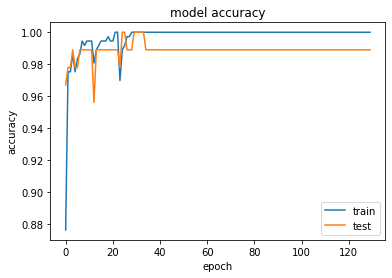

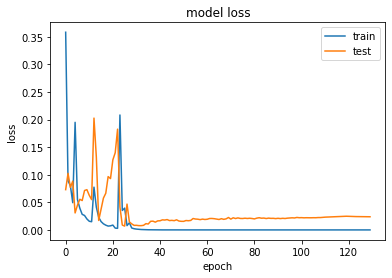

In [44]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


#Evaluating Model
score  = model.predict_classes(X_test)

# converting from categorical to normal classes data 

In [29]:

def cate(Y_test):
    Y_test_ = []
    for i in Y_test:
        Y_test_.append(np.argmax(i))
        
    return Y_test_

Y_train_ = cate(Y_train)
Y_test_ = cate(Y_test)

# Accuracy Score

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Test Accuracy score of the data {accuracy_score(score, Y_test_)}")
print(f"Train Accuracy score of the data {accuracy_score(model.predict_classes(X_train), Y_train_)}")

Test Accuracy score of the data 0.9649122807017544
Train Accuracy score of the data 1.0


# Classification report

In [31]:
print("********* TRAIN CLASSIFICATION REPORT ***********")
print(" ")
print(classification_report(model.predict_classes(X_train), Y_train_))

print(" ")

print("********* TEST CLASSIFICATION REPORT ***********")
print(" ")
print(classification_report(score, Y_test_))

********* TRAIN CLASSIFICATION REPORT ***********
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00       137

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364

 
********* TEST CLASSIFICATION REPORT ***********
 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        74
           1       0.95      0.95      0.95        40

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# Confusion matrix

Test Accuracy score of the data 
 [[72  2]
 [ 2 38]]


<AxesSubplot:>

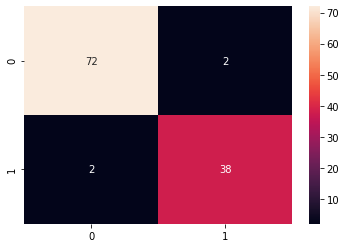

In [32]:
print(f"Test Accuracy score of the data \n {confusion_matrix(score, Y_test_)}")
sns.heatmap(confusion_matrix(score, Y_test_), annot=True)

Train Accuracy score of the data 
 [[227   0]
 [  0 137]]


<AxesSubplot:>

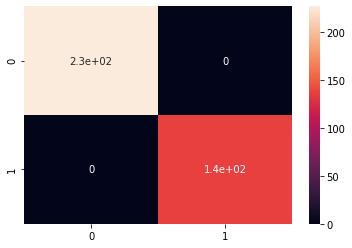

In [33]:
print(f"Train Accuracy score of the data \n {confusion_matrix(model.predict_classes(X_train), Y_train_)}")
sns.heatmap(confusion_matrix(model.predict_classes(X_train), Y_train_), annot=True)

# Tuner 

In [34]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [35]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [36]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=50,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

INFO:tensorflow:Reloading Oracle from existing project my_dir\helloworld\oracle.json
INFO:tensorflow:Reloading Tuner from my_dir\helloworld\tuner0.json


In [37]:
tuner.search_space_summary()

Search space summary
Default search space size: 16
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [38]:
tuner.search(X_train, Y_train,
             epochs=5,
             validation_data=(X_val, Y_val))

Trial 45 Complete [00h 00m 05s]
val_accuracy: 0.9890109896659851

Best val_accuracy So Far: 0.9963369965553284
Total elapsed time: 00h 07m 11s
INFO:tensorflow:Oracle triggered exit


In [39]:
models = tuner.get_best_models(num_models=2)

In [40]:
tuner.results_summary()

Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 6
units_0: 512
units_1: 32
learning_rate: 0.001
units_2: 416
units_3: 96
units_4: 416
units_5: 128
units_6: 384
units_7: 480
units_8: 288
units_9: 224
units_10: 128
units_11: 320
units_12: 352
units_13: 352
units_14: 384
units_15: 64
units_16: 32
Score: 0.9963369965553284
Trial summary
Hyperparameters:
num_layers: 7
units_0: 256
units_1: 160
learning_rate: 0.001
units_2: 96
units_3: 352
units_4: 288
units_5: 352
units_6: 416
units_7: 64
units_8: 288
units_9: 32
units_10: 384
units_11: 64
units_12: 288
units_13: 288
units_14: 256
units_15: 480
units_16: 64
units_17: 160
units_18: 288
units_19: 96
Score: 0.9963369965553284
Trial summary
Hyperparameters:
num_layers: 8
units_0: 256
units_1: 448
learning_rate: 0.0001
units_2: 448
units_3: 320
units_4: 224
units_5: 192
units_6: 448
units_7: 64
units_8: 256
units_9: 256
units_10: 480
un